# Importar librerias y el dataset



In [1]:
pip install -r req.txt

Note: you may need to restart the kernel to use updated packages.


In [55]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from numpy import genfromtxt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
#from google.colab import files
import io
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation,Conv2D
from keras.optimizers import SGD
from keras import backend as K
import tensorflow as tf
from tensorflow.keras import optimizers
from sklearn.preprocessing import  MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

# Funciones adicionales

## Plot confusion matrix multi label

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )

    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    axes.set_xlabel('Predicted label')
    axes.set_ylabel('True label')
    axes.set_title("CM for the class - " + class_label)

In [3]:
#Test
y_b =  [1,1,4,1,1,1]
y_b2 = [1,1,3,5,5,5]

In [4]:
def graficar_multi(cm,class_names):
    fig, ax = plt.subplots(4, 3, figsize=(12, 7))

    for axes, cfs_matrix, label in zip(ax.flatten(), cm, class_names):
      print_confusion_matrix(cfs_matrix, axes, label, ["N", "Y"])
        
    fig.tight_layout()
    plt.show()

# Importacion de los dataset y muestra de los datos

## Importamos el dataset de la libreria de keras para poder realizar su visualizacion 

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

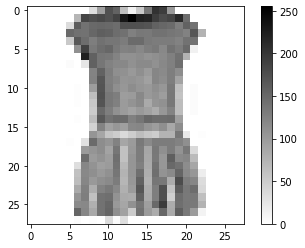

In [6]:
plt.figure()
plt.imshow(train_images[3], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
class_names = ['Camiseta', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo',
'Sandalia', 'Camisa', 'Zapatilla deportiva', 'Bolso', 'Botines']

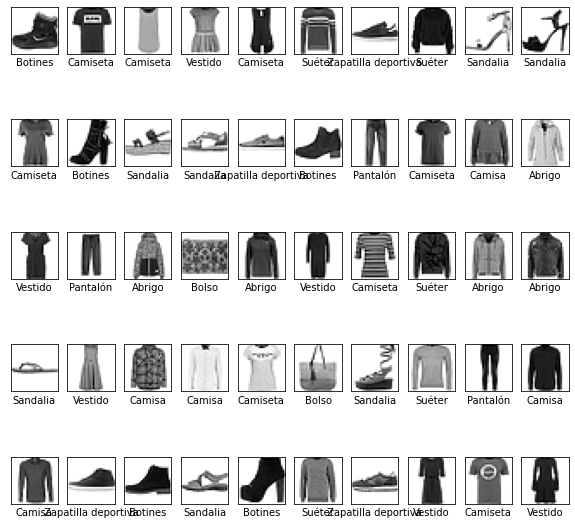

In [9]:
plt.figure(figsize=(10,10))
for i in range(50):
  plt.subplot(5,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_
             images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [8]:
train_images = train_images / 255

In [9]:
test_images = test_images / 255

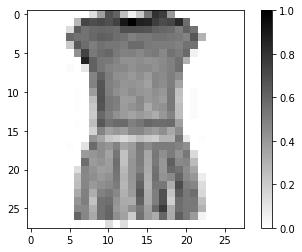

In [10]:
plt.figure()
plt.imshow(train_images[3], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

## Importamos el data set desde los archivos .csv para el entrenamiento del modelo

### Importamos el conjunto de datos de entrenamieto

In [11]:
my_data_1 = genfromtxt('fashion-mnist_train.csv', delimiter=',')

In [12]:
my_data_1 = np.delete(my_data_1, 0, 0)

In [13]:
my_data_1

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]])

In [14]:
X_train = np.delete(my_data_1, 0, 1)
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
y = my_data_1[:,0]
y

array([2., 9., 6., ..., 8., 8., 7.])

In [16]:
y_train = keras.utils.to_categorical(y,num_classes=10)
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [17]:
X_train.shape

(60000, 784)

In [18]:
y_train.shape

(60000, 10)

### Importamos el conjunto de datos de prueba

In [19]:
my_data_2 = genfromtxt('fashion-mnist_test.csv', delimiter=',')

In [20]:
my_data_2 = np.delete(my_data_2, 0, 0)

In [21]:
my_data_2

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 1., 0.],
       [8., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [22]:
X_test = np.delete(my_data_2, 0, 1)
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 3., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
y_2 = my_data_2[:,0]
y_2

array([0., 1., 2., ..., 8., 8., 1.])

In [24]:
y_test = keras.utils.to_categorical(y_2,num_classes=10)
y_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [25]:
X_test.shape

(10000, 784)

In [26]:
y_test.shape

(10000, 10)

In [27]:
y_train_ori_int = y.astype(int)
y_test_ori_int  = y_2.astype(int)

# Modelo inicial

## 1. Probando una clasificador con Navie bayes MultinomialNB

#### Entrenamiento

In [29]:
clf = MultinomialNB()

In [30]:
clf.fit(X_train, y)

MultinomialNB()

#### Resultados

In [31]:
y_naive_bayes = clf.predict(X_train)
y_naive_bayes_test = clf.predict(X_test)

In [32]:
clf.score(X_train, y)

0.6653333333333333

In [33]:
clf.score(X_test, y_2)

0.6674

In [34]:
print('Naive Bayes\n\nTrain:\n')
print('Orden de las etiquetas: \n{}'.format(class_names))
print('Precision por clase: \n{}'.format(precision_score(y, y_naive_bayes, average=None)))
print('Precisión micro: \n{}'.format(precision_score(y, y_naive_bayes, average='micro')))
print('Precisión macro: \n{}'.format(precision_score(y, y_naive_bayes, average='macro')))
print('Precisión pesada: \n{}'.format(precision_score(y, y_naive_bayes, average='weighted')))
print('\n\nTest:\n')
print('Orden de las etiquetas: \n{}'.format(class_names))
print('Precision por clase: \n{}'.format(precision_score(y_2, y_naive_bayes_test, average=None)))
print('Precisión micro: \n{}'.format(precision_score(y_2, y_naive_bayes_test, average='micro')))
print('Precisión macro: \n{}'.format(precision_score(y_2, y_naive_bayes_test, average='macro')))
print('Precisión pesada: \n{}'.format(precision_score(y_2, y_naive_bayes_test, average='weighted')))

Naive Bayes

Train:

Orden de las etiquetas: 
['Camiseta', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo', 'Sandalia', 'Camisa', 'Zapatilla deportiva', 'Bolso', 'Botines']
Precision por clase: 
[0.73621252 0.98050037 0.6224794  0.65457921 0.46304935 0.66151582
 0.33917309 0.59234162 0.88755459 0.69354839]
Precisión micro: 
0.6653333333333333
Precisión macro: 
0.663095434206207
Precisión pesada: 
0.663095434206207


Test:

Orden de las etiquetas: 
['Camiseta', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo', 'Sandalia', 'Camisa', 'Zapatilla deportiva', 'Bolso', 'Botines']
Precision por clase: 
[0.73759542 0.97408207 0.62603306 0.65860806 0.46656649 0.70562771
 0.32599119 0.58712614 0.88677249 0.68760469]
Precisión micro: 
0.6674
Precisión macro: 
0.6656007310886742
Precisión pesada: 
0.6656007310886742


In [110]:
print('Naive Bayes\n\nTrain:\n')
print(classification_report(y_true=y_train_ori_int,y_pred=y_naive_bayes,target_names=class_names))
print('\n\nTest:\n')
print(classification_report(y_true=y_test_ori_int, y_pred=y_naive_bayes_test,target_names=class_names))

Naive Bayes

Train:

                     precision    recall  f1-score   support

           Camiseta       0.74      0.79      0.76      6000
           Pantalón       0.98      0.89      0.93      6000
             Suéter       0.62      0.59      0.61      6000
            Vestido       0.65      0.88      0.75      6000
             Abrigo       0.46      0.63      0.53      6000
           Sandalia       0.66      0.15      0.24      6000
             Camisa       0.34      0.16      0.22      6000
Zapatilla deportiva       0.59      0.92      0.72      6000
              Bolso       0.89      0.81      0.85      6000
            Botines       0.69      0.83      0.76      6000

           accuracy                           0.67     60000
          macro avg       0.66      0.67      0.64     60000
       weighted avg       0.66      0.67      0.64     60000



Test:

                     precision    recall  f1-score   support

           Camiseta       0.74      0.77      0.75 

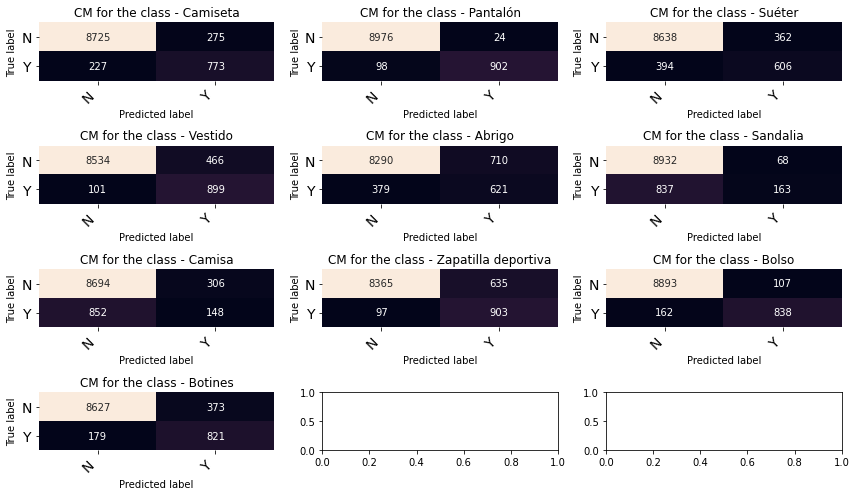

In [77]:
cm = sklearn.metrics.multilabel_confusion_matrix(y_true=y_ori_test_int,y_pred=y_naive_bayes_test,labels=[0,1,2,3,4,5,6,7,8,9])
graficar_multi(cm,class_names)

## 2. Probando utilizando un arbol de desicion

#### Entrenando

In [37]:
dtree_model = DecisionTreeClassifier(max_depth = 10).fit(X_train, y)

In [38]:
dtree_model.score(X_train, y)

0.848

#### Resultados

In [39]:
y_dtree_train = dtree_model.predict(X_train)
y_dtree_test = dtree_model.predict(X_test)

In [112]:
print('Arbol de decision\n\nTrain:\n')
print(classification_report(y_pred=y_dtree_train,y_true=y_train_ori_int,target_names=class_names))
print('\n\nTest:\n')
print(classification_report(y_pred=y_dtree_test,y_true=y_test_ori_int,target_names=class_names))

Arbol de decision

Train:

                     precision    recall  f1-score   support

           Camiseta       0.80      0.85      0.83      6000
           Pantalón       0.99      0.94      0.97      6000
             Suéter       0.76      0.69      0.73      6000
            Vestido       0.84      0.86      0.85      6000
             Abrigo       0.66      0.78      0.72      6000
           Sandalia       0.97      0.93      0.95      6000
             Camisa       0.66      0.60      0.63      6000
Zapatilla deportiva       0.90      0.95      0.92      6000
              Bolso       0.97      0.94      0.96      6000
            Botines       0.95      0.93      0.94      6000

           accuracy                           0.85     60000
          macro avg       0.85      0.85      0.85     60000
       weighted avg       0.85      0.85      0.85     60000



Test:

                     precision    recall  f1-score   support

           Camiseta       0.74      0.79     

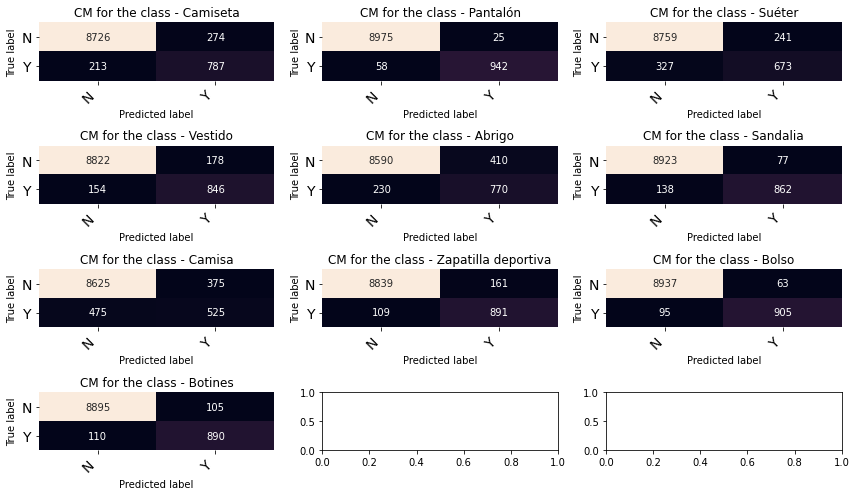

In [113]:
cm = sklearn.metrics.multilabel_confusion_matrix(y_true=y_2.astype(int),y_pred=y_dtree_test,labels=[0,1,2,3,4,5,6,7,8,9])
graficar_multi(cm,class_names)

## 3. Red neuronal

### Entrenamineto

In [267]:
keras.backend.clear_session()
model_keras = Sequential()

In [268]:
model_keras.add(Dense(units=100,activation='relu',input_dim=784))
model_keras.add(Dense(units=10,activation='softmax'))

In [269]:
model_keras.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [270]:
scaler = MinMaxScaler()
X_train_norm = X_train/255

In [271]:
model_keras.fit(X_train_norm, y_train, epochs=100, batch_size=1024)

Epoch 1/100
59/59 [==============================] - 0s 5ms/step - loss: 2.2747 - accuracy: 0.1016
Epoch 2/100
59/59 [==============================] - 0s 5ms/step - loss: 2.1560 - accuracy: 0.1799
Epoch 3/100
59/59 [==============================] - 0s 5ms/step - loss: 2.0566 - accuracy: 0.2943
Epoch 4/100
59/59 [==============================] - 0s 5ms/step - loss: 1.9694 - accuracy: 0.4000
Epoch 5/100
59/59 [==============================] - 0s 5ms/step - loss: 1.8914 - accuracy: 0.4664
Epoch 6/100
59/59 [==============================] - 0s 5ms/step - loss: 1.8205 - accuracy: 0.5114
Epoch 7/100
59/59 [==============================] - 0s 5ms/step - loss: 1.7554 - accuracy: 0.5426
Epoch 8/100
59/59 [==============================] - 0s 6ms/step - loss: 1.6953 - accuracy: 0.5666
Epoch 9/100
59/59 [==============================] - 0s 6ms/step - loss: 1.6397 - accuracy: 0.5846
Epoch 10/100
59/59 [==============================] - 0s 5ms/step - loss: 1.5881 - accuracy: 0.5976
Epoch 11/

59/59 [==============================] - 0s 5ms/step - loss: 0.7518 - accuracy: 0.7529
Epoch 84/100
59/59 [==============================] - 0s 5ms/step - loss: 0.7493 - accuracy: 0.7538
Epoch 85/100
59/59 [==============================] - 0s 5ms/step - loss: 0.7468 - accuracy: 0.7546
Epoch 86/100
59/59 [==============================] - 0s 5ms/step - loss: 0.7443 - accuracy: 0.7552
Epoch 87/100
59/59 [==============================] - 0s 5ms/step - loss: 0.7419 - accuracy: 0.7561
Epoch 88/100
59/59 [==============================] - 0s 5ms/step - loss: 0.7395 - accuracy: 0.7565
Epoch 89/100
59/59 [==============================] - 0s 5ms/step - loss: 0.7372 - accuracy: 0.7571
Epoch 90/100
59/59 [==============================] - 0s 5ms/step - loss: 0.7348 - accuracy: 0.7577
Epoch 91/100
59/59 [==============================] - 0s 5ms/step - loss: 0.7326 - accuracy: 0.7581
Epoch 92/100
59/59 [==============================] - 0s 5ms/step - loss: 0.7304 - accuracy: 0.7592
Epoch 93/100


### Resultados

In [277]:
model_keras.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [278]:
y_keras_train_one_hot = model_keras.predict(X_train)
y_keras_test_one_hot = model_keras.predict(X_test)

In [279]:
y_keras_train = np.argmax(y_keras_train_one_hot,axis=1)
y_keras_test = np.argmax(y_keras_test_one_hot,axis=1)

In [280]:
print('Red neuronal\n\nTrain:\n')
print(classification_report(y_pred=y_keras_train,y_true=y_train_ori_int,target_names=class_names))
print('\n\nTest:\n')
print(classification_report(y_pred=y_keras_test,y_true=y_test_ori_int,target_names=class_names))

Red neuronal

Train:

                     precision    recall  f1-score   support

           Camiseta       0.74      0.81      0.77      6000
           Pantalón       0.97      0.91      0.94      6000
             Suéter       0.67      0.63      0.65      6000
            Vestido       0.77      0.84      0.80      6000
             Abrigo       0.56      0.78      0.65      6000
           Sandalia       0.98      0.48      0.64      6000
             Camisa       0.51      0.27      0.35      6000
Zapatilla deportiva       0.70      0.89      0.79      6000
              Bolso       0.89      0.92      0.91      6000
            Botines       0.76      0.94      0.84      6000

           accuracy                           0.75     60000
          macro avg       0.76      0.75      0.73     60000
       weighted avg       0.76      0.75      0.73     60000



Test:

                     precision    recall  f1-score   support

           Camiseta       0.71      0.80      0.75

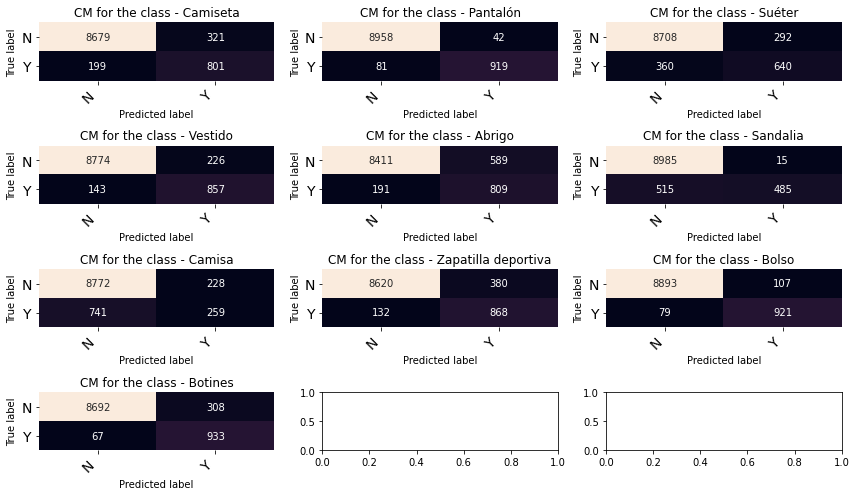

In [276]:
cm = sklearn.metrics.multilabel_confusion_matrix(y_true=y_2.astype(int),y_pred=y_keras_test,labels=[0,1,2,3,4,5,6,7,8,9])
graficar_multi(cm,class_names)

## Evaluacion del Desempeño

### Resultados de los modelos

#### 1. Naive Bayes Multinomial

In [118]:
print('Naive Bayes\n\nTrain:\n')
print(classification_report(y_true=y_train_ori_int,y_pred=y_naive_bayes,target_names=class_names))
print('\n\nTest:\n')
print(classification_report(y_true=y_test_ori_int, y_pred=y_naive_bayes_test,target_names=class_names))

Naive Bayes

Train:

                     precision    recall  f1-score   support

           Camiseta       0.74      0.79      0.76      6000
           Pantalón       0.98      0.89      0.93      6000
             Suéter       0.62      0.59      0.61      6000
            Vestido       0.65      0.88      0.75      6000
             Abrigo       0.46      0.63      0.53      6000
           Sandalia       0.66      0.15      0.24      6000
             Camisa       0.34      0.16      0.22      6000
Zapatilla deportiva       0.59      0.92      0.72      6000
              Bolso       0.89      0.81      0.85      6000
            Botines       0.69      0.83      0.76      6000

           accuracy                           0.67     60000
          macro avg       0.66      0.67      0.64     60000
       weighted avg       0.66      0.67      0.64     60000



Test:

                     precision    recall  f1-score   support

           Camiseta       0.74      0.77      0.75 

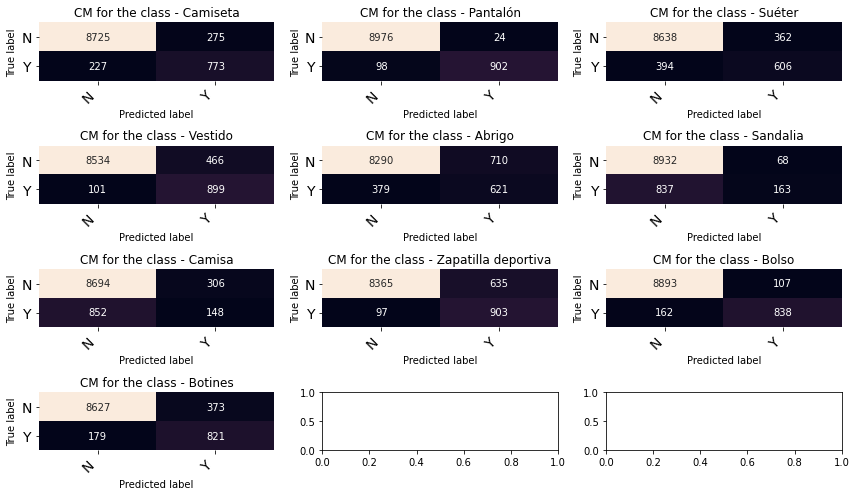

In [52]:
cm = sklearn.metrics.multilabel_confusion_matrix(y_true=y_2.astype(int),y_pred=y_naive_bayes_test,labels=[0,1,2,3,4,5,6,7,8,9])
graficar_multi(cm,class_names)

#### 2.  Arbol de decision

In [119]:
print('Arbol de decision\n\nTrain:\n')
print(classification_report(y_pred=y_dtree_train,y_true=y_train_ori_int,target_names=class_names))
print('\n\nTest:\n')
print(classification_report(y_pred=y_dtree_test,y_true=y_test_ori_int,target_names=class_names))

Arbol de decision

Train:

                     precision    recall  f1-score   support

           Camiseta       0.80      0.85      0.83      6000
           Pantalón       0.99      0.94      0.97      6000
             Suéter       0.76      0.69      0.73      6000
            Vestido       0.84      0.86      0.85      6000
             Abrigo       0.66      0.78      0.72      6000
           Sandalia       0.97      0.93      0.95      6000
             Camisa       0.66      0.60      0.63      6000
Zapatilla deportiva       0.90      0.95      0.92      6000
              Bolso       0.97      0.94      0.96      6000
            Botines       0.95      0.93      0.94      6000

           accuracy                           0.85     60000
          macro avg       0.85      0.85      0.85     60000
       weighted avg       0.85      0.85      0.85     60000



Test:

                     precision    recall  f1-score   support

           Camiseta       0.74      0.79     

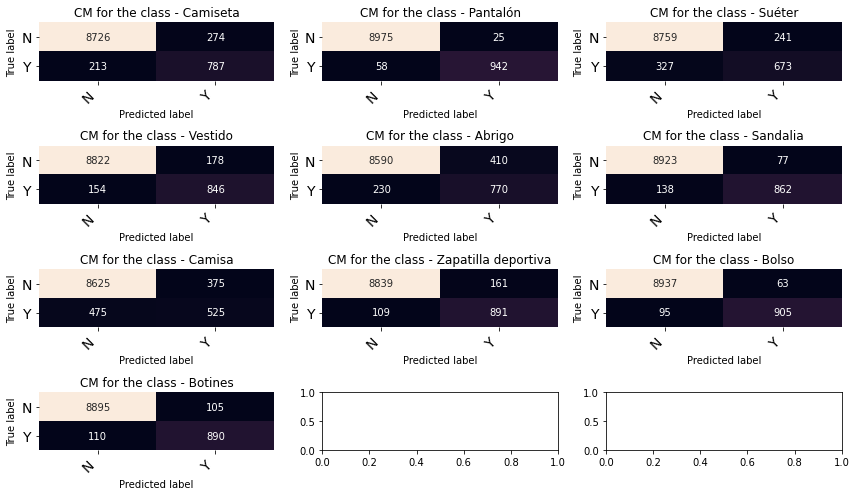

In [55]:
cm = sklearn.metrics.multilabel_confusion_matrix(y_true=y_2.astype(int),y_pred=y_dtree_test,labels=[0,1,2,3,4,5,6,7,8,9])
graficar_multi(cm,class_names)

#### 3. Red neuronal

In [120]:
print('Red neuronal\n\nTrain:\n')
print(classification_report(y_pred=y_keras_train,y_true=y_train_ori_int,target_names=class_names))
print('\n\nTest:\n')
print(classification_report(y_pred=y_keras_test,y_true=y_test_ori_int,target_names=class_names))

Red neuronal

Train:

                     precision    recall  f1-score   support

           Camiseta       0.00      0.00      0.00      6000
           Pantalón       0.00      0.00      0.00      6000
             Suéter       0.00      0.00      0.00      6000
            Vestido       0.00      0.00      0.00      6000
             Abrigo       0.00      0.00      0.00      6000
           Sandalia       0.98      0.77      0.86      6000
             Camisa       0.16      1.00      0.27      6000
Zapatilla deportiva       0.78      0.86      0.82      6000
              Bolso       0.96      0.68      0.79      6000
            Botines       0.83      0.90      0.87      6000

           accuracy                           0.42     60000
          macro avg       0.37      0.42      0.36     60000
       weighted avg       0.37      0.42      0.36     60000



Test:

                     precision    recall  f1-score   support

           Camiseta       0.00      0.00      0.00

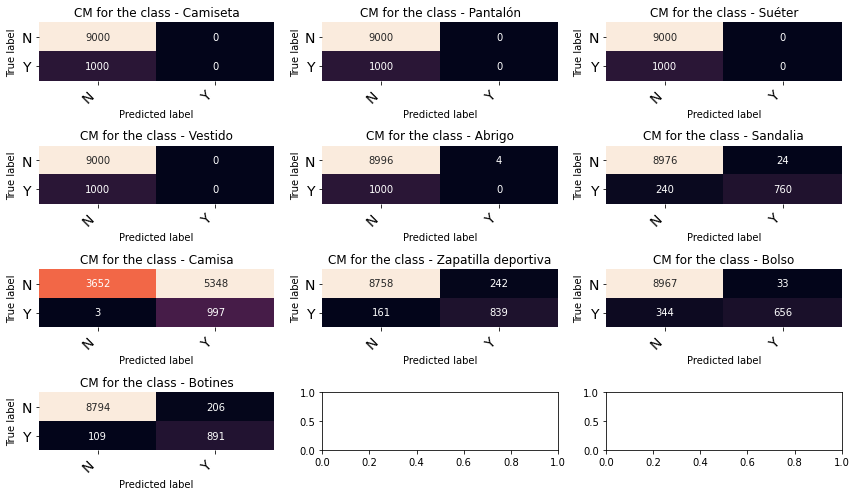

In [57]:
cm = sklearn.metrics.multilabel_confusion_matrix(y_true=y_2.astype(int),y_pred=y_keras_test,labels=[0,1,2,3,4,5,6,7,8,9])
graficar_multi(cm,class_names)

#### graficar curva de error

## ver bias y varianza

# Optimizacion

## 1. Normalizacion

### Creando el modelo inical pero con datos normalizados

In [30]:
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)

In [33]:
keras.backend.clear_session()
model_norm = Sequential()
model_norm.add(Dense(10,activation='relu',input_dim=784))
model_norm.add(Dense(10,activation='softmax'))
model_norm.compile(loss='categorical_crossentropy',metrics=['accuracy'])
model_norm.fit(X_train_norm, y_train, epochs=25)

Epoch 1/25
1875/1875 [==============================] - 1s 585us/step - loss: 0.6543 - accuracy: 0.7796
Epoch 2/25
1875/1875 [==============================] - 1s 591us/step - loss: 0.4702 - accuracy: 0.8354
Epoch 3/25
1875/1875 [==============================] - 1s 583us/step - loss: 0.4410 - accuracy: 0.8469
Epoch 4/25
1875/1875 [==============================] - 1s 617us/step - loss: 0.4245 - accuracy: 0.8527
Epoch 5/25
1875/1875 [==============================] - 1s 580us/step - loss: 0.4134 - accuracy: 0.8559
Epoch 6/25
1875/1875 [==============================] - 1s 585us/step - loss: 0.4059 - accuracy: 0.8582
Epoch 7/25
1875/1875 [==============================] - 1s 594us/step - loss: 0.4002 - accuracy: 0.8612
Epoch 8/25
1875/1875 [==============================] - 1s 581us/step - loss: 0.3943 - accuracy: 0.8627
Epoch 9/25
1875/1875 [==============================] - 1s 589us/step - loss: 0.3901 - accuracy: 0.8643
Epoch 10/25
1875/1875 [==============================] - 1s 595u

### Evaluacion del modelo Normalizado

In [46]:
model_norm.evaluate(X_test_norm, y_test)

313/313 [==============================] - 0s 671us/step - loss: 0.4705 - accuracy: 0.8484


[0.4705321192741394, 0.8483999967575073]

In [ ]:
model_norm.evaluate(X_train_norm, y_train)

In [42]:
y_keras_train_one_hot = model_norm.predict(X_train_norm)
y_keras_test_one_hot = model_norm.predict(X_test_norm)

In [43]:
y_keras_train = np.argmax(y_keras_train_one_hot,axis=1)
y_keras_test = np.argmax(y_keras_test_one_hot,axis=1)

In [44]:
print('Red neuronal\n\nTrain:\n')
print(classification_report(y_pred=y_keras_train,y_true=y_train_ori_int,target_names=class_names))
print('\n\nTest:\n')
print(classification_report(y_pred=y_keras_test,y_true=y_test_ori_int,target_names=class_names))

Red neuronal

Train:

                     precision    recall  f1-score   support

           Camiseta       0.82      0.82      0.82      6000
           Pantalón       0.99      0.95      0.97      6000
             Suéter       0.78      0.78      0.78      6000
            Vestido       0.76      0.94      0.84      6000
             Abrigo       0.77      0.78      0.78      6000
           Sandalia       0.98      0.94      0.96      6000
             Camisa       0.77      0.52      0.62      6000
Zapatilla deportiva       0.94      0.93      0.93      6000
              Bolso       0.88      0.97      0.92      6000
            Botines       0.93      0.97      0.95      6000

           accuracy                           0.86     60000
          macro avg       0.86      0.86      0.86     60000
       weighted avg       0.86      0.86      0.86     60000



Test:

                     precision    recall  f1-score   support

           Camiseta       0.81      0.81      0.81

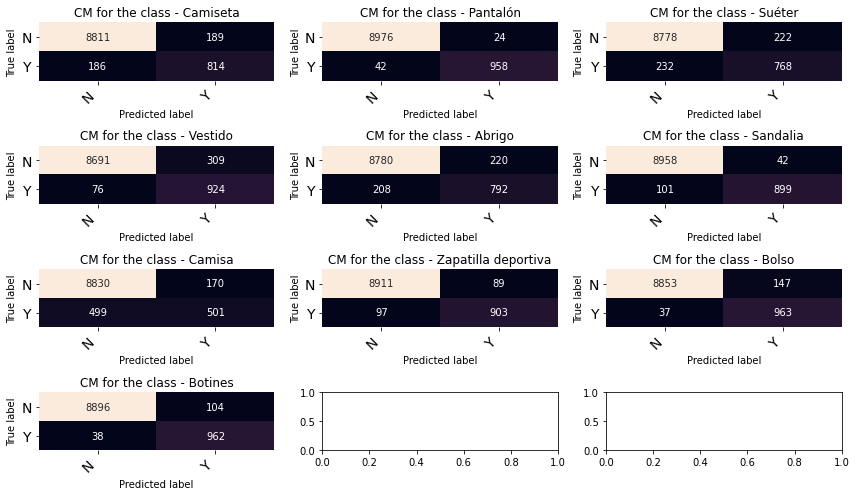

In [45]:
cm = sklearn.metrics.multilabel_confusion_matrix(y_true=y_2.astype(int),y_pred=y_keras_test,labels=[0,1,2,3,4,5,6,7,8,9])
graficar_multi(cm,class_names)

## 2. Estandariacion

### Creacion del modelo inical con datos estandarizados

In [31]:
scaler_2 = StandardScaler()
scaler_2.fit(X_train)
X_train_stand = scaler_2.transform(X_train)
X_test_stand = scaler_2.transform(X_test)

In [32]:
keras.backend.clear_session()
model_std = Sequential()
model_std.add(Dense(10,activation='relu',input_dim=784))
model_std.add(Dense(10,activation='softmax'))
model_std.compile(loss='categorical_crossentropy',metrics=['accuracy'])
model_std.fit(X_train_stand, y_train, epochs=25)

Epoch 1/25
1875/1875 [==============================] - 1s 619us/step - loss: 0.6129 - accuracy: 0.7966
Epoch 2/25
1875/1875 [==============================] - 1s 589us/step - loss: 0.4365 - accuracy: 0.8478
Epoch 3/25
1875/1875 [==============================] - 1s 571us/step - loss: 0.4117 - accuracy: 0.8558
Epoch 4/25
1875/1875 [==============================] - 1s 578us/step - loss: 0.3989 - accuracy: 0.8621
Epoch 5/25
1875/1875 [==============================] - 1s 581us/step - loss: 0.3904 - accuracy: 0.8647
Epoch 6/25
1875/1875 [==============================] - 1s 573us/step - loss: 0.3843 - accuracy: 0.8670
Epoch 7/25
1875/1875 [==============================] - 1s 577us/step - loss: 0.3787 - accuracy: 0.8686
Epoch 8/25
1875/1875 [==============================] - 1s 589us/step - loss: 0.3771 - accuracy: 0.8705
Epoch 9/25
1875/1875 [==============================] - 1s 566us/step - loss: 0.3728 - accuracy: 0.8718
Epoch 10/25
1875/1875 [==============================] - 1s 568u

### Evaluacion del Modelo estandarizado

In [50]:
model_std.evaluate(X_train_stand, y_train)

1875/1875 [==============================] - 1s 411us/step - loss: 0.3625 - accuracy: 0.8739


[0.3624950051307678, 0.8739333152770996]

In [51]:
model_std.evaluate(X_test_stand, y_test)

313/313 [==============================] - 0s 657us/step - loss: 0.4369 - accuracy: 0.8584


[0.4368848204612732, 0.8583999872207642]

In [52]:
y_keras_train_one_hot = model_std.predict(X_train_stand)
y_keras_test_one_hot = model_std.predict(X_test_stand)

In [53]:
y_keras_train = np.argmax(y_keras_train_one_hot,axis=1)
y_keras_test = np.argmax(y_keras_test_one_hot,axis=1)

In [54]:
print('Red neuronal\n\nTrain:\n')
print(classification_report(y_pred=y_keras_train,y_true=y_train_ori_int,target_names=class_names))
print('\n\nTest:\n')
print(classification_report(y_pred=y_keras_test,y_true=y_test_ori_int,target_names=class_names))

Red neuronal

Train:

                     precision    recall  f1-score   support

           Camiseta       0.82      0.85      0.83      6000
           Pantalón       0.99      0.98      0.98      6000
             Suéter       0.82      0.72      0.77      6000
            Vestido       0.89      0.88      0.89      6000
             Abrigo       0.68      0.90      0.77      6000
           Sandalia       0.95      0.97      0.96      6000
             Camisa       0.77      0.58      0.66      6000
Zapatilla deportiva       0.94      0.95      0.95      6000
              Bolso       0.95      0.97      0.96      6000
            Botines       0.98      0.93      0.95      6000

           accuracy                           0.87     60000
          macro avg       0.88      0.87      0.87     60000
       weighted avg       0.88      0.87      0.87     60000



Test:

                     precision    recall  f1-score   support

           Camiseta       0.79      0.84      0.81

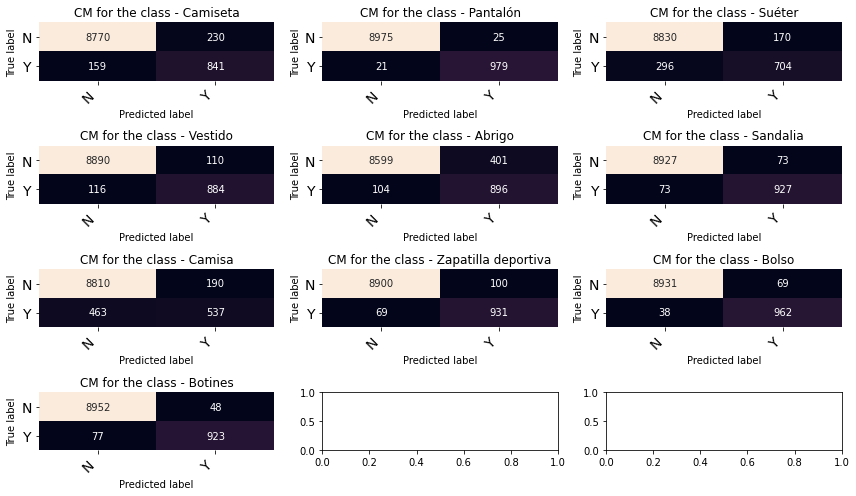

In [55]:
cm = sklearn.metrics.multilabel_confusion_matrix(y_true=y_2.astype(int),y_pred=y_keras_test,labels=[0,1,2,3,4,5,6,7,8,9])
graficar_multi(cm,class_names)

## 3. Modelo con ADAM

### Creacion del modelo inicial con ADAM

In [97]:
keras.backend.clear_session()
model_adam = Sequential()
model_adam.add(Dense(10,activation='relu',input_dim=784))
model_adam.add(Dense(10,activation='softmax'))
optimizer = optimizers.Adam()
model_adam.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model_adam.fit(X_train_stand, y_train, epochs=25)

Epoch 1/25
1875/1875 [==============================] - 1s 580us/step - loss: 0.5728 - accuracy: 0.7975
Epoch 2/25
1875/1875 [==============================] - 1s 578us/step - loss: 0.4316 - accuracy: 0.8466
Epoch 3/25
1875/1875 [==============================] - 1s 577us/step - loss: 0.4064 - accuracy: 0.8543
Epoch 4/25
1875/1875 [==============================] - 1s 586us/step - loss: 0.3920 - accuracy: 0.8588
Epoch 5/25
1875/1875 [==============================] - 1s 577us/step - loss: 0.3787 - accuracy: 0.8630
Epoch 6/25
1875/1875 [==============================] - 1s 578us/step - loss: 0.3711 - accuracy: 0.8648
Epoch 7/25
1875/1875 [==============================] - 1s 575us/step - loss: 0.3637 - accuracy: 0.8700
Epoch 8/25
1875/1875 [==============================] - 1s 577us/step - loss: 0.3566 - accuracy: 0.8725
Epoch 9/25
1875/1875 [==============================] - 1s 586us/step - loss: 0.3507 - accuracy: 0.8738
Epoch 10/25
1875/1875 [==============================] - 1s 580u

### Evaluacion del modelo con ADAM

In [98]:
model_adam.evaluate(X_train_stand, y_train)

1875/1875 [==============================] - 1s 396us/step - loss: 0.2999 - accuracy: 0.8926


[0.2998698651790619, 0.8925666809082031]

In [99]:
model_adam.evaluate(X_test_stand, y_test)

313/313 [==============================] - 0s 636us/step - loss: 0.4020 - accuracy: 0.8610


[0.4019642770290375, 0.8610000014305115]

In [39]:
y_keras_train_one_hot = model_adam.predict(X_train_stand)
y_keras_test_one_hot = model_adam.predict(X_test_stand)

In [40]:
y_keras_train = np.argmax(y_keras_train_one_hot,axis=1)
y_keras_test = np.argmax(y_keras_test_one_hot,axis=1)

In [41]:
print('Red neuronal\n\nTrain:\n')
print(classification_report(y_pred=y_keras_train,y_true=y_train_ori_int,target_names=class_names))
print('\n\nTest:\n')
print(classification_report(y_pred=y_keras_test,y_true=y_test_ori_int,target_names=class_names))

Red neuronal

Train:

                     precision    recall  f1-score   support

           Camiseta       0.82      0.85      0.84      6000
           Pantalón       0.99      0.97      0.98      6000
             Suéter       0.81      0.83      0.82      6000
            Vestido       0.86      0.91      0.89      6000
             Abrigo       0.80      0.82      0.81      6000
           Sandalia       0.97      0.97      0.97      6000
             Camisa       0.76      0.66      0.71      6000
Zapatilla deportiva       0.96      0.95      0.95      6000
              Bolso       0.96      0.98      0.97      6000
            Botines       0.96      0.97      0.97      6000

           accuracy                           0.89     60000
          macro avg       0.89      0.89      0.89     60000
       weighted avg       0.89      0.89      0.89     60000



Test:

                     precision    recall  f1-score   support

           Camiseta       0.79      0.83      0.81

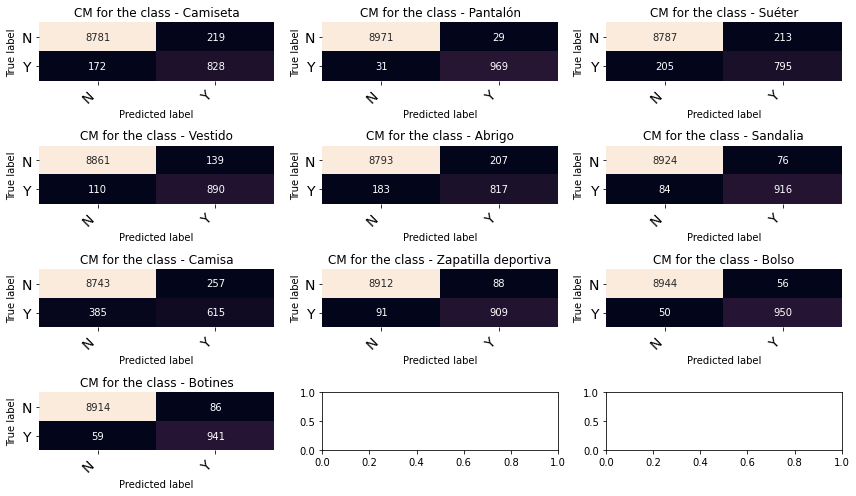

In [42]:
cm = sklearn.metrics.multilabel_confusion_matrix(y_true=y_2.astype(int),y_pred=y_keras_test,labels=[0,1,2,3,4,5,6,7,8,9])
graficar_multi(cm,class_names)

## 4. Modelo con Minibatch

### Creamos una funcion que crea modelos un tamaño de mini batch 2^n

In [100]:
def correr_modelo_mini_batch(batch_size):
    keras.backend.clear_session()
    model_mini_batch = Sequential()
    model_mini_batch.add(Dense(10,activation='relu',input_dim=784))
    model_mini_batch.add(Dense(10,activation='softmax'))
    optimizer = optimizers.Adam()
    model_mini_batch.compile(loss='categorical_crossentropy',optimizer=optimizer ,metrics=['accuracy'])
    model_mini_batch.fit(X_train_stand, y_train, epochs=25, batch_size=batch_size)
    return model_mini_batch.evaluate(X_train_stand, y_train)

### Creamos modelos con distintos tamaños de mini batch y guardamos su presicion

In [44]:
batch_size = []
acc_value = []
for i in range(3, 14):
  batch_size.append(i)
  acc_value.append(correr_modelo_mini_batch(2**i)[1])

Epoch 1/25
7500/7500 [==============================] - 4s 551us/step - loss: 0.5074 - accuracy: 0.8202
Epoch 2/25
7500/7500 [==============================] - 4s 514us/step - loss: 0.4095 - accuracy: 0.8526
Epoch 3/25
7500/7500 [==============================] - 4s 517us/step - loss: 0.3874 - accuracy: 0.8590
Epoch 4/25
7500/7500 [==============================] - 4s 516us/step - loss: 0.3762 - accuracy: 0.8655
Epoch 5/25
7500/7500 [==============================] - 4s 515us/step - loss: 0.3652 - accuracy: 0.8671
Epoch 6/25
7500/7500 [==============================] - 4s 517us/step - loss: 0.3590 - accuracy: 0.8689
Epoch 7/25
7500/7500 [==============================] - 4s 521us/step - loss: 0.3530 - accuracy: 0.8721
Epoch 8/25
7500/7500 [==============================] - 4s 550us/step - loss: 0.3481 - accuracy: 0.8721
Epoch 9/25
7500/7500 [==============================] - 4s 557us/step - loss: 0.3450 - accuracy: 0.8744
Epoch 10/25
7500/7500 [==============================] - 4s 522u

1875/1875 [==============================] - 1s 435us/step - loss: 0.3102 - accuracy: 0.8877
Epoch 1/25
938/938 [==============================] - 1s 740us/step - loss: 0.6038 - accuracy: 0.7912
Epoch 2/25
938/938 [==============================] - 1s 743us/step - loss: 0.4322 - accuracy: 0.8462
Epoch 3/25
938/938 [==============================] - 1s 761us/step - loss: 0.4038 - accuracy: 0.8576
Epoch 4/25
938/938 [==============================] - 1s 776us/step - loss: 0.3878 - accuracy: 0.8614
Epoch 5/25
938/938 [==============================] - 1s 743us/step - loss: 0.3785 - accuracy: 0.8646
Epoch 6/25
938/938 [==============================] - 1s 753us/step - loss: 0.3708 - accuracy: 0.8677
Epoch 7/25
938/938 [==============================] - 1s 750us/step - loss: 0.3639 - accuracy: 0.8705
Epoch 8/25
938/938 [==============================] - 1s 788us/step - loss: 0.3588 - accuracy: 0.8730
Epoch 9/25
938/938 [==============================] - 1s 779us/step - loss: 0.3543 - accura

118/118 [==============================] - 0s 2ms/step - loss: 1.1355 - accuracy: 0.6248
Epoch 2/25
118/118 [==============================] - 0s 2ms/step - loss: 0.5938 - accuracy: 0.8053
Epoch 3/25
118/118 [==============================] - 0s 2ms/step - loss: 0.4994 - accuracy: 0.8298
Epoch 4/25
118/118 [==============================] - 0s 2ms/step - loss: 0.4583 - accuracy: 0.8429
Epoch 5/25
118/118 [==============================] - 0s 2ms/step - loss: 0.4344 - accuracy: 0.8509
Epoch 6/25
118/118 [==============================] - 0s 2ms/step - loss: 0.4192 - accuracy: 0.8568
Epoch 7/25
118/118 [==============================] - 0s 2ms/step - loss: 0.4074 - accuracy: 0.8596
Epoch 8/25
118/118 [==============================] - 0s 2ms/step - loss: 0.3986 - accuracy: 0.8620
Epoch 9/25
118/118 [==============================] - 0s 2ms/step - loss: 0.3912 - accuracy: 0.8651
Epoch 10/25
118/118 [==============================] - 0s 2ms/step - loss: 0.3857 - accuracy: 0.8669
Epoch 11/2

15/15 [==============================] - 0s 8ms/step - loss: 0.6840 - accuracy: 0.7703
Epoch 6/25
15/15 [==============================] - 0s 7ms/step - loss: 0.6352 - accuracy: 0.7874
Epoch 7/25
15/15 [==============================] - 0s 7ms/step - loss: 0.5990 - accuracy: 0.8001
Epoch 8/25
15/15 [==============================] - 0s 7ms/step - loss: 0.5710 - accuracy: 0.8092
Epoch 9/25
15/15 [==============================] - 0s 7ms/step - loss: 0.5486 - accuracy: 0.8153
Epoch 10/25
15/15 [==============================] - 0s 7ms/step - loss: 0.5304 - accuracy: 0.8200
Epoch 11/25
15/15 [==============================] - 0s 7ms/step - loss: 0.5154 - accuracy: 0.8242
Epoch 12/25
15/15 [==============================] - 0s 7ms/step - loss: 0.5025 - accuracy: 0.8278
Epoch 13/25
15/15 [==============================] - 0s 7ms/step - loss: 0.4912 - accuracy: 0.8310
Epoch 14/25
15/15 [==============================] - 0s 7ms/step - loss: 0.4819 - accuracy: 0.8339
Epoch 15/25
15/15 [=======

### Graficamos la presicion de cada modelo dependiendo del numero de mini batch

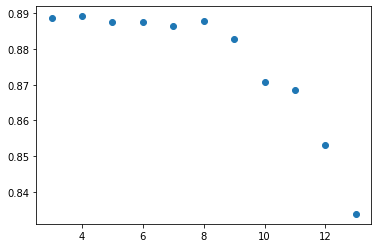

In [45]:
plt.scatter(batch_size,acc_value)
plt.show()

### Funcion para hacer la evaluacion anterior varias veces

In [ ]:
def find_max_acc_minibatch():
  best_batch_size = []
  best_acc_value = []
  for i in range(0,2):
    batch_size = []
    acc_value = []
    for i in range(5, 9):
      batch_size.append(2**i)
      acc_value.append(correr_modelo_mini_batch(2**i)[1])
    maxindex = acc_value.index(max(acc_value))
    best_batch_size.append(batch_size[maxindex])
    best_acc_value.append(acc_value[maxindex])
  print(best_batch_size)
  print(best_acc_value)

In [ ]:
find_max_acc_minibatch()

## 5. Modelo Optimizado final

In [102]:
keras.backend.clear_session()
model_opt = Sequential()
model_opt.add(Dense(10,activation='relu',input_dim=784))
model_opt.add(Dense(10,activation='softmax'))
optimizer = optimizers.Adam()
model_opt.compile(loss='categorical_crossentropy',optimizer=optimizer ,metrics=['accuracy'])
model_opt.fit(X_train_stand, y_train, epochs=25,  batch_size=2**5)

Epoch 1/25
1875/1875 [==============================] - 1s 592us/step - loss: 0.5796 - accuracy: 0.8001
Epoch 2/25
1875/1875 [==============================] - 1s 581us/step - loss: 0.4284 - accuracy: 0.8454
Epoch 3/25
1875/1875 [==============================] - 1s 582us/step - loss: 0.4021 - accuracy: 0.8557
Epoch 4/25
1875/1875 [==============================] - 1s 581us/step - loss: 0.3874 - accuracy: 0.8594
Epoch 5/25
1875/1875 [==============================] - 1s 581us/step - loss: 0.3782 - accuracy: 0.8632
Epoch 6/25
1875/1875 [==============================] - 1s 589us/step - loss: 0.3698 - accuracy: 0.8661
Epoch 7/25
1875/1875 [==============================] - 1s 583us/step - loss: 0.3629 - accuracy: 0.8676
Epoch 8/25
1875/1875 [==============================] - 1s 580us/step - loss: 0.3576 - accuracy: 0.8691
Epoch 9/25
1875/1875 [==============================] - 1s 582us/step - loss: 0.3521 - accuracy: 0.8717
Epoch 10/25
1875/1875 [==============================] - 1s 580u

### Evaluacion del modelo inicial optimizado

In [50]:
model_opt.evaluate(X_train_stand, y_train)

1875/1875 [==============================] - 1s 442us/step - loss: 0.3059 - accuracy: 0.8877


[0.30586326122283936, 0.8877166509628296]

In [49]:
model_opt.evaluate(X_test_stand, y_test)

313/313 [==============================] - 0s 683us/step - loss: 0.4083 - accuracy: 0.8595


[0.4082653224468231, 0.859499990940094]

In [87]:
y_keras_train_one_hot = model_opt.predict(X_train_stand)
y_keras_test_one_hot = model_opt.predict(X_test_stand)

In [88]:
y_keras_train = np.argmax(y_keras_train_one_hot,axis=1)
y_keras_test = np.argmax(y_keras_test_one_hot,axis=1)

In [89]:
print('Red neuronal\n\nTrain:\n')
print(classification_report(y_pred=y_keras_train,y_true=y_train_ori_int,target_names=class_names))
print('\n\nTest:\n')
print(classification_report(y_pred=y_keras_test,y_true=y_test_ori_int,target_names=class_names))

Red neuronal

Train:

                     precision    recall  f1-score   support

           Camiseta       0.80      0.87      0.83      6000
           Pantalón       0.94      0.98      0.96      6000
             Suéter       0.77      0.84      0.80      6000
            Vestido       0.89      0.88      0.89      6000
             Abrigo       0.80      0.80      0.80      6000
           Sandalia       0.95      0.98      0.96      6000
             Camisa       0.77      0.60      0.68      6000
Zapatilla deportiva       0.96      0.93      0.95      6000
              Bolso       0.96      0.96      0.96      6000
            Botines       0.95      0.97      0.96      6000

           accuracy                           0.88     60000
          macro avg       0.88      0.88      0.88     60000
       weighted avg       0.88      0.88      0.88     60000



Test:

                     precision    recall  f1-score   support

           Camiseta       0.77      0.85      0.81

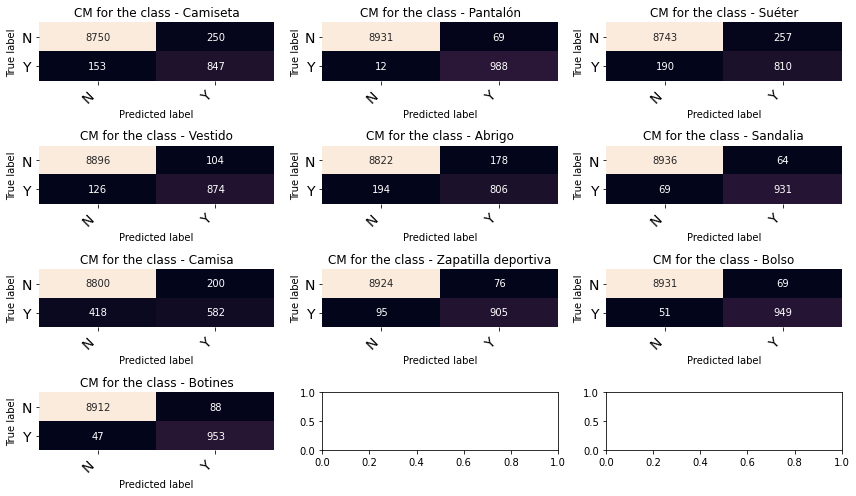

In [90]:
cm = sklearn.metrics.multilabel_confusion_matrix(y_true=y_2.astype(int),y_pred=y_keras_test,labels=[0,1,2,3,4,5,6,7,8,9])
graficar_multi(cm,class_names)

# Iniciar busqueda de hyperparametros


## 1. Caso BIAS

### Tasa de aprendizaje

In [85]:
def correr_modelo_learing_rate(learning_rate):
    keras.backend.clear_session()
    model_ta = Sequential()
    model_ta.add(Dense(10,activation='relu',input_dim=784))
    model_ta.add(Dense(10,activation='softmax'))
    optimizer = optimizers.Adam(learning_rate)
    model_ta.compile(loss='categorical_crossentropy',optimizer=optimizer ,metrics=['accuracy'])
    model_ta.fit(X_train_stand, y_train, epochs=40,  batch_size=2**5)
    return model_ta.evaluate(X_train_stand, y_train)

### Codigo que evalua la tasa de aprendizaje con 1/(10^n)

In [84]:
learn_list = []
acc_value = []
for i in range(2, 8):
  learn_list.append(i)
  acc_value.append(correr_modelo_learing_rate(1/(10**i))[1])

Epoch 1/35
1875/1875 [==============================] - 1s 639us/step - loss: 0.5648 - accuracy: 0.8054
Epoch 2/35
1875/1875 [==============================] - 1s 642us/step - loss: 0.4951 - accuracy: 0.8287
Epoch 3/35
1875/1875 [==============================] - 1s 714us/step - loss: 0.4753 - accuracy: 0.8351
Epoch 4/35
1875/1875 [==============================] - 1s 667us/step - loss: 0.4646 - accuracy: 0.8386
Epoch 5/35
1875/1875 [==============================] - 1s 676us/step - loss: 0.4651 - accuracy: 0.8391
Epoch 6/35
1875/1875 [==============================] - 1s 648us/step - loss: 0.4596 - accuracy: 0.8417
Epoch 7/35
1875/1875 [==============================] - 1s 636us/step - loss: 0.4597 - accuracy: 0.8418
Epoch 8/35
1875/1875 [==============================] - 1s 678us/step - loss: 0.4499 - accuracy: 0.8447
Epoch 9/35
1875/1875 [==============================] - 1s 661us/step - loss: 0.4449 - accuracy: 0.8455
Epoch 10/35
1875/1875 [==============================] - 1s 649u

1875/1875 [==============================] - 1s 647us/step - loss: 0.4279 - accuracy: 0.8529
Epoch 8/35
1875/1875 [==============================] - 1s 625us/step - loss: 0.4189 - accuracy: 0.8554
Epoch 9/35
1875/1875 [==============================] - 1s 633us/step - loss: 0.4118 - accuracy: 0.8574
Epoch 10/35
1875/1875 [==============================] - 1s 634us/step - loss: 0.4055 - accuracy: 0.8595
Epoch 11/35
1875/1875 [==============================] - 1s 647us/step - loss: 0.4000 - accuracy: 0.8614
Epoch 12/35
1875/1875 [==============================] - 1s 630us/step - loss: 0.3956 - accuracy: 0.8624
Epoch 13/35
1875/1875 [==============================] - 1s 627us/step - loss: 0.3917 - accuracy: 0.8637
Epoch 14/35
1875/1875 [==============================] - 1s 658us/step - loss: 0.3880 - accuracy: 0.8650
Epoch 15/35
1875/1875 [==============================] - 1s 631us/step - loss: 0.3847 - accuracy: 0.8661
Epoch 16/35
1875/1875 [==============================] - 1s 626us/ste

1875/1875 [==============================] - 1s 635us/step - loss: 1.6055 - accuracy: 0.3513
Epoch 12/35
1875/1875 [==============================] - 1s 625us/step - loss: 1.5673 - accuracy: 0.3692
Epoch 13/35
1875/1875 [==============================] - 1s 626us/step - loss: 1.5321 - accuracy: 0.3881
Epoch 14/35
1875/1875 [==============================] - 1s 620us/step - loss: 1.4991 - accuracy: 0.4092
Epoch 15/35
1875/1875 [==============================] - 1s 645us/step - loss: 1.4682 - accuracy: 0.4339
Epoch 16/35
1875/1875 [==============================] - 1s 627us/step - loss: 1.4391 - accuracy: 0.4533
Epoch 17/35
1875/1875 [==============================] - 1s 629us/step - loss: 1.4113 - accuracy: 0.4719
Epoch 18/35
1875/1875 [==============================] - 1s 642us/step - loss: 1.3848 - accuracy: 0.4895
Epoch 19/35
1875/1875 [==============================] - 1s 748us/step - loss: 1.3595 - accuracy: 0.5048
Epoch 20/35
1875/1875 [==============================] - 1s 741us/s

### Graficamos la presicion dependiendo del modelo

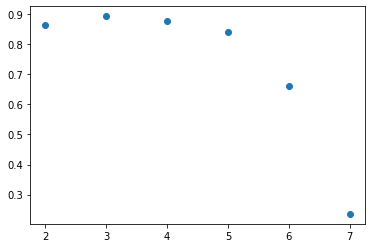

In [87]:
plt.scatter(learn_list,acc_value)
plt.show()

### Codigo que evalua la tasa de aprendizaje con n/(10^3)

In [88]:
learn_list = []
acc_value = []
for i in range(1, 13):
  learn_list.append(i)
  acc_value.append(correr_modelo_learing_rate(i/(10**3))[1])

Epoch 1/40
1875/1875 [==============================] - 1s 672us/step - loss: 0.5654 - accuracy: 0.8032
Epoch 2/40
1875/1875 [==============================] - 1s 668us/step - loss: 0.4273 - accuracy: 0.8464
Epoch 3/40
1875/1875 [==============================] - 1s 648us/step - loss: 0.4009 - accuracy: 0.8567
Epoch 4/40
1875/1875 [==============================] - 1s 660us/step - loss: 0.3850 - accuracy: 0.8610
Epoch 5/40
1875/1875 [==============================] - 1s 647us/step - loss: 0.3754 - accuracy: 0.8651
Epoch 6/40
1875/1875 [==============================] - 1s 688us/step - loss: 0.3679 - accuracy: 0.8668
Epoch 7/40
1875/1875 [==============================] - 1s 659us/step - loss: 0.3621 - accuracy: 0.8675
Epoch 8/40
1875/1875 [==============================] - 1s 658us/step - loss: 0.3570 - accuracy: 0.8695
Epoch 9/40
1875/1875 [==============================] - 1s 610us/step - loss: 0.3528 - accuracy: 0.8717
Epoch 10/40
1875/1875 [==============================] - 1s 668u

1875/1875 [==============================] - 1s 640us/step - loss: 0.3081 - accuracy: 0.8864
Epoch 39/40
1875/1875 [==============================] - 1s 641us/step - loss: 0.3077 - accuracy: 0.8859
Epoch 40/40
1875/1875 [==============================] - 1s 435us/step - loss: 0.3071 - accuracy: 0.8864
Epoch 1/40
1875/1875 [==============================] - 1s 675us/step - loss: 0.5090 - accuracy: 0.8191
Epoch 2/40
1875/1875 [==============================] - 1s 673us/step - loss: 0.4209 - accuracy: 0.8486
Epoch 3/40
1875/1875 [==============================] - 1s 685us/step - loss: 0.4005 - accuracy: 0.8553
Epoch 4/40
1875/1875 [==============================] - 1s 682us/step - loss: 0.3858 - accuracy: 0.8591
Epoch 5/40
1875/1875 [==============================] - 1s 639us/step - loss: 0.3774 - accuracy: 0.8621
Epoch 6/40
1875/1875 [==============================] - 1s 633us/step - loss: 0.3708 - accuracy: 0.8649
Epoch 7/40
1875/1875 [==============================] - 1s 639us/step - l

1875/1875 [==============================] - 1s 727us/step - loss: 0.3262 - accuracy: 0.8814
Epoch 35/40
1875/1875 [==============================] - 1s 747us/step - loss: 0.3271 - accuracy: 0.8806
Epoch 36/40
1875/1875 [==============================] - 1s 704us/step - loss: 0.3257 - accuracy: 0.8815
Epoch 37/40
1875/1875 [==============================] - 1s 713us/step - loss: 0.3257 - accuracy: 0.8810
Epoch 38/40
1875/1875 [==============================] - 1s 665us/step - loss: 0.3260 - accuracy: 0.8794
Epoch 39/40
1875/1875 [==============================] - 1s 609us/step - loss: 0.3265 - accuracy: 0.8794
Epoch 40/40
1875/1875 [==============================] - 1s 434us/step - loss: 0.3034 - accuracy: 0.8884
Epoch 1/40
1875/1875 [==============================] - 1s 648us/step - loss: 0.5165 - accuracy: 0.8190
Epoch 2/40
1875/1875 [==============================] - 1s 652us/step - loss: 0.4295 - accuracy: 0.8466
Epoch 3/40
1875/1875 [==============================] - 1s 628us/step

1875/1875 [==============================] - 1s 692us/step - loss: 0.3619 - accuracy: 0.8708
Epoch 29/40
1875/1875 [==============================] - 1s 669us/step - loss: 0.3628 - accuracy: 0.8704
Epoch 30/40
1875/1875 [==============================] - 1s 631us/step - loss: 0.3632 - accuracy: 0.8700
Epoch 31/40
1875/1875 [==============================] - 1s 627us/step - loss: 0.3596 - accuracy: 0.8724
Epoch 32/40
1875/1875 [==============================] - 1s 632us/step - loss: 0.3610 - accuracy: 0.8714
Epoch 33/40
1875/1875 [==============================] - 1s 626us/step - loss: 0.3618 - accuracy: 0.8697
Epoch 34/40
1875/1875 [==============================] - 1s 635us/step - loss: 0.3635 - accuracy: 0.8712
Epoch 35/40
1875/1875 [==============================] - 1s 651us/step - loss: 0.3576 - accuracy: 0.8709
Epoch 36/40
1875/1875 [==============================] - 1s 624us/step - loss: 0.3582 - accuracy: 0.8717
Epoch 37/40
1875/1875 [==============================] - 1s 628us/s

1875/1875 [==============================] - 1s 641us/step - loss: 0.4066 - accuracy: 0.8561
Epoch 23/40
1875/1875 [==============================] - 1s 646us/step - loss: 0.3971 - accuracy: 0.8594
Epoch 24/40
1875/1875 [==============================] - 1s 646us/step - loss: 0.4041 - accuracy: 0.8583
Epoch 25/40
1875/1875 [==============================] - 1s 634us/step - loss: 0.3989 - accuracy: 0.8592
Epoch 26/40
1875/1875 [==============================] - 1s 670us/step - loss: 0.3973 - accuracy: 0.8596
Epoch 27/40
1875/1875 [==============================] - 1s 685us/step - loss: 0.3934 - accuracy: 0.8610
Epoch 28/40
1875/1875 [==============================] - 1s 676us/step - loss: 0.3939 - accuracy: 0.8594
Epoch 29/40
1875/1875 [==============================] - 1s 671us/step - loss: 0.4006 - accuracy: 0.8581
Epoch 30/40
1875/1875 [==============================] - 1s 630us/step - loss: 0.3987 - accuracy: 0.8578
Epoch 31/40
1875/1875 [==============================] - 1s 645us/s

1875/1875 [==============================] - 1s 616us/step - loss: 0.4247 - accuracy: 0.8560
Epoch 17/40
1875/1875 [==============================] - 1s 608us/step - loss: 0.4273 - accuracy: 0.8553
Epoch 18/40
1875/1875 [==============================] - 1s 610us/step - loss: 0.4329 - accuracy: 0.8561
Epoch 19/40
1875/1875 [==============================] - 1s 608us/step - loss: 0.4254 - accuracy: 0.8560
Epoch 20/40
1875/1875 [==============================] - 1s 600us/step - loss: 0.4187 - accuracy: 0.8582
Epoch 21/40
1875/1875 [==============================] - 1s 592us/step - loss: 0.4182 - accuracy: 0.8593
Epoch 22/40
1875/1875 [==============================] - 1s 600us/step - loss: 0.4207 - accuracy: 0.8561
Epoch 23/40
1875/1875 [==============================] - 1s 612us/step - loss: 0.4266 - accuracy: 0.8553
Epoch 24/40
1875/1875 [==============================] - 1s 611us/step - loss: 0.4240 - accuracy: 0.8564
Epoch 25/40
1875/1875 [==============================] - 1s 612us/s

1875/1875 [==============================] - 1s 578us/step - loss: 0.4761 - accuracy: 0.8405
Epoch 13/40
1875/1875 [==============================] - 1s 567us/step - loss: 0.4762 - accuracy: 0.8415
Epoch 14/40
1875/1875 [==============================] - 1s 587us/step - loss: 0.4722 - accuracy: 0.8436
Epoch 15/40
1875/1875 [==============================] - 1s 568us/step - loss: 0.4697 - accuracy: 0.8431
Epoch 16/40
1875/1875 [==============================] - 1s 591us/step - loss: 0.4715 - accuracy: 0.8436
Epoch 17/40
1875/1875 [==============================] - 1s 573us/step - loss: 0.4670 - accuracy: 0.8466
Epoch 18/40
1875/1875 [==============================] - 1s 568us/step - loss: 0.4654 - accuracy: 0.8471
Epoch 19/40
1875/1875 [==============================] - 1s 572us/step - loss: 0.4609 - accuracy: 0.8486
Epoch 20/40
1875/1875 [==============================] - 1s 571us/step - loss: 0.4614 - accuracy: 0.8483
Epoch 21/40
1875/1875 [==============================] - 1s 567us/s

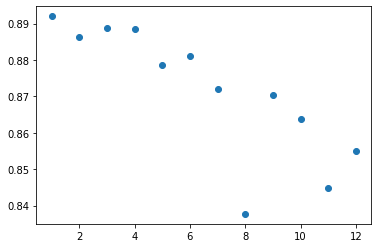

In [89]:
plt.scatter(learn_list,acc_value)
plt.show()

### Numero de capas


### Numero nodos

## 2. Caso varianza

Meterle mas datos

Regularizacion

# Modelo final

In [104]:
keras.backend.clear_session()
model_final = Sequential()
model_final.add(Dense(100,activation='relu',input_dim=784))
model_final.add(Dense(100,activation='relu'))
model_final.add(Dense(100,activation='relu'))
model_final.add(Dense(60,activation='relu'))
model_final.add(Dense(30,activation='relu'))
model_final.add(Dense(10,activation='softmax'))
optimizer = optimizers.Adam(0.001)
model_final.compile(loss='categorical_crossentropy',optimizer=optimizer ,metrics=['accuracy'])
model_final.fit(X_train_stand, y_train, epochs=55,  batch_size=2**5)

Epoch 1/55
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4623 - accuracy: 0.8326
Epoch 2/55
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3525 - accuracy: 0.8727
Epoch 3/55
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3152 - accuracy: 0.8852
Epoch 4/55
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2903 - accuracy: 0.8935
Epoch 5/55
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2730 - accuracy: 0.9004
Epoch 6/55
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2537 - accuracy: 0.9056
Epoch 7/55
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2415 - accuracy: 0.9105
Epoch 8/55
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2280 - accuracy: 0.9155
Epoch 9/55
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2172 - accuracy: 0.9189
Epoch 10/55
1875/1875 [==============================] - 2s 1ms/step - loss: 0.209

In [105]:
model_final.evaluate(X_train_stand, y_train)

1875/1875 [==============================] - 1s 567us/step - loss: 0.0406 - accuracy: 0.9869


[0.04057087004184723, 0.9868500232696533]

In [106]:
model_final.evaluate(X_test_stand, y_test)

313/313 [==============================] - 0s 815us/step - loss: 0.5791 - accuracy: 0.8963


[0.5791091918945312, 0.8963000178337097]